In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Question 1:  
hand writing reservoir sampline algrithm that stores m number of data

In [2]:
def reservoir_sampling(filename, m):
    '''this algrithom take a file with data and randomly selected m data using reservoir sampling
    input: (str) datafile name
    output: (pd.DataFrame)

    Note: this function requires pandas to run,
    run: import pandas as pd aforehead'''
    
    reservoir=[]
    file = open(filename, 'r')
    row_num = 0
    n = 1000000 # give n a large number to make sure the loop goes on until the file has been completely read
    while row_num < n:
        line = file.readline()
        
        if line == '': #break if read till the end
            file.close()
            print("finished reading the file")
            break
        
        if line[0] == '#': #skip the rows with comment
            continue
            
        if row_num < m:# check if in first m elements
            reservoir.append(line)
        else:#if not in first m element
            r = np.random.randint(0, row_num)
            if r < m:
                reservoir[r] = line
        row_num += 1
    
    # change the selected data lines to dataframe
    print("start to convert stored list to pd.Dataframe")
    dir_reservoir = {}
    for gene in reservoir:
        line = gene.split(' ')
        for i in range(len(line)):
            if i == 0:
                dir_reservoir[line[0]] = []
            else:
                if line[i] != '':
                    dir_reservoir[line[0]].append(float(line[i]))        
    df_reservoir = pd.DataFrame(dir_reservoir)
    print("successfully generate dataframe")
    return df_reservoir

In [3]:
rr = reservoir_sampling('pset2-data.tbl', 10)
rr

finished reading the file
start to convert stored list to pd.Dataframe
successfully generate dataframe


,THSD4,RP11-235D19.4,OR4D6,DPYSL3,FNBP1L,MT-ND6,MAF1,PRRG4,MT2A,TAZ
0,147.1,280.0,234.8,299.5,280.4,229.5,288.3,206.8,48.5,306.3
1,145.0,289.6,254.7,311.1,280.4,230.2,288.3,207.2,55.5,300.1
2,153.4,282.0,222.3,310.4,280.9,225.7,282.5,205.8,63.5,305.3
3,162.9,286.6,240.1,295.8,275.7,227.1,282.4,217.9,55.8,292.1
4,158.4,269.3,241.1,292.7,274.9,221.3,278.1,217.2,48.5,304.7
5,61.0,180.2,135.2,203.0,185.2,130.4,181.6,115.8,152.2,204.3
6,61.4,169.2,134.0,162.0,181.4,130.0,177.8,111.6,152.3,194.4
7,50.3,179.5,132.6,200.6,182.9,129.5,178.3,105.3,158.1,214.7
8,53.8,178.9,136.2,177.6,182.0,129.5,187.9,115.9,165.5,196.1
9,50.6,174.0,140.7,196.2,187.7,136.7,187.1,103.9,156.9,193.1


### Question 2:
print out the largest and smallest expression of the gene

In [4]:
gender_name = ['F','F','F','F','F','M','M','M','M','M','M','F','M','F','F','F','M','F','M','M']
type_name = ['wt','wt','wt','wt','wt','wt','wt','wt','wt','wt','mut','mut','mut','mut','mut','mut','mut','mut','mut','mut']
header = [type_name, gender_name]
df = pd.read_table('pset2-data.tbl', delim_whitespace=True
                    ,comment='#', header=None)
# df.columns = type_name
df = df.set_axis(df.iloc[:,0], axis=0)
df = df.iloc[0:-1,1:]
print("the uncleaned data size is:", len(df))
df.head()

the uncleaned data size is: 20030


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,,,,,,,,,,,,,,,,,,,,
anise,80.2,94.0,90.6,96.4,91.9,199.8,189.5,191.8,196.0,180.2,150.3,132.6,202.6,150.0,186.1,121.4,151.0,192.0,175.3,146.5
apricot,192.1,164.9,164.6,177.4,185.1,79.5,80.9,68.0,83.7,89.0,161.1,159.5,113.6,48.8,177.1,107.1,164.5,61.3,105.6,192.0
artichoke,242.4,246.5,253.6,255.5,255.7,151.5,158.8,147.0,146.0,154.7,188.7,180.5,251.0,283.9,144.8,260.8,158.6,209.5,241.5,144.3
arugula,95.0,112.1,112.2,99.4,106.8,193.9,214.9,203.1,204.9,194.7,78.2,220.0,268.3,119.2,126.3,150.9,158.9,119.0,208.4,134.9
asparagus,170.9,164.5,179.5,178.0,169.0,273.3,276.1,279.1,273.9,276.4,278.9,151.2,247.9,131.5,217.5,317.9,210.9,202.0,229.3,221.6


In [5]:
df_err_nd = df[df.iloc[:,1] == 'n.d.']
print('there are {} number of rows with "n.d." as content'.format(len(df_err_nd)))
df = df[df.iloc[:,1] != 'n.d.']
print("the length of df after dropped 'n.p.' row is:", len(df))
df = df.astype(float)
df.head()

there are 16 number of rows with "n.d." as content
the length of df after dropped 'n.p.' row is: 20014


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,,,,,,,,,,,,,,,,,,,,
anise,80.2,94.0,90.6,96.4,91.9,199.8,189.5,191.8,196.0,180.2,150.3,132.6,202.6,150.0,186.1,121.4,151.0,192.0,175.3,146.5
apricot,192.1,164.9,164.6,177.4,185.1,79.5,80.9,68.0,83.7,89.0,161.1,159.5,113.6,48.8,177.1,107.1,164.5,61.3,105.6,192.0
artichoke,242.4,246.5,253.6,255.5,255.7,151.5,158.8,147.0,146.0,154.7,188.7,180.5,251.0,283.9,144.8,260.8,158.6,209.5,241.5,144.3
arugula,95.0,112.1,112.2,99.4,106.8,193.9,214.9,203.1,204.9,194.7,78.2,220.0,268.3,119.2,126.3,150.9,158.9,119.0,208.4,134.9
asparagus,170.9,164.5,179.5,178.0,169.0,273.3,276.1,279.1,273.9,276.4,278.9,151.2,247.9,131.5,217.5,317.9,210.9,202.0,229.3,221.6


In [6]:
max_num = df.iloc[0:-1,1:].max(axis=1).max(axis=0)
# max_row = df[df.max(axis=1) == max_num]
max_row = df[df.values == max_num]
print('the maximum number of expression is', max_num)
print('and the name of the genes is', max_row.index.values[0:])

the maximum number of expression is 437.6
and the name of the genes is ['ZAR1L']


In [7]:
min_num = df.min(axis=1).min(axis=0)
# max_row = df[df.max(axis=1) == max_num]
min_row = df[df.iloc[:,1] == min_num]
print('the minimum number of expression is', min_num)
print('and the name of the genes are', min_row.index.values[0:])

the minimum number of expression is -999.0
and the name of the genes are ['TMCO1' 'C2orf16' 'TRIM42' 'DUSP1' 'HIST1H2AB' 'WBSCR27' 'FREM1' 'TRIM5'
 'USP47' 'RTN4RL2' 'KDELC2' 'MSRB2' 'IGFBP6' 'DUSP6' 'SUMO2' 'ANKRD62'
 'C18orf54' 'FAM83D' 'SERHL2' 'CH507-152C13.3']


### Question 3:
Clean the data and leave with 19,995 lines
(i.e., clean the data with `n.d.` and `-999.0` as content)  
Note: as `n.d.` has been cleaned for the previous question, the following step will clean `-999.0`

In [8]:
for err in min_row.index.values:
    df = df[df.index != err]

In [9]:
print("the gene number with minimun expression number is:", len(min_row))
print("the gene number after cleaned is:",len(df))

the gene number with minimun expression number is: 20
the gene number after cleaned is: 19994


In [10]:
# store the cleaned data in csv
df.to_csv('cleaned_pset2_data.csv')

### Question 4:
Write a script that converts the data table to a new file in tidy data format.

In [11]:
df_trans = df.transpose()
# df_temp.columns = header
df_trans.head(20)
# header = [type_name, gender_name]
df_trans["genotype"] = type_name
df_trans["gender"] = gender_name

In [12]:
df_trans.head(40)

,anise,apricot,artichoke,arugula,asparagus,avocado,banana,basil,beet,blackberry,...,AC007325.2,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,genotype,gender
1,80.2,192.1,242.4,95.0,170.9,222.9,147.9,67.1,274.7,237.6,...,236.8,177.1,57.1,284.0,152.0,166.8,207.9,226.0,wt,F
2,94.0,164.9,246.5,112.1,164.5,217.5,170.2,92.6,284.3,240.6,...,226.4,172.4,56.7,304.5,152.7,183.1,176.8,216.7,wt,F
3,90.6,164.6,253.6,112.2,179.5,216.8,154.0,77.2,268.2,235.0,...,233.8,196.1,55.3,282.8,165.6,179.9,181.0,225.2,wt,F
4,96.4,177.4,255.5,99.4,178.0,219.3,146.7,74.7,275.4,255.5,...,230.9,184.9,56.7,310.5,150.2,176.8,179.6,216.4,wt,F
5,91.9,185.1,255.7,106.8,169.0,225.2,154.2,78.3,273.1,218.5,...,234.3,178.8,65.9,280.2,160.1,168.9,182.3,220.4,wt,F
6,199.8,79.5,151.5,193.9,273.3,116.4,255.2,183.7,179.7,129.1,...,134.2,92.7,166.9,188.1,68.5,267.9,280.5,129.5,wt,M
7,189.5,80.9,158.8,214.9,276.1,111.2,255.7,192.0,177.8,130.1,...,132.6,82.5,168.1,184.1,66.9,284.4,266.8,113.1,wt,M
8,191.8,68.0,147.0,203.1,279.1,117.9,252.9,174.4,198.8,138.9,...,134.9,98.8,157.7,196.0,54.4,290.0,295.3,135.1,wt,M
9,196.0,83.7,146.0,204.9,273.9,127.2,262.1,172.3,178.5,140.8,...,148.2,86.3,157.9,208.5,60.7,275.0,291.2,120.7,wt,M
10,180.2,89.0,154.7,194.7,276.4,102.4,237.4,181.2,160.6,120.8,...,132.7,91.1,172.6,181.9,52.6,259.0,287.0,122.4,wt,M


In [13]:
df_melt = pd.melt(df_trans, id_vars=list(df_trans.columns[-2:]), value_vars=list(df_trans.columns[:-2]), 
                 value_name= 'expression',var_name="gene")
df_melt.head(50)

,genotype,gender,gene,expression
0,wt,F,anise,80.2
1,wt,F,anise,94.0
2,wt,F,anise,90.6
3,wt,F,anise,96.4
4,wt,F,anise,91.9
5,wt,M,anise,199.8
6,wt,M,anise,189.5
7,wt,M,anise,191.8
8,wt,M,anise,196.0
9,wt,M,anise,180.2


In [14]:
df_melt.to_csv('pset2_tidy_handwrite.csv')

### Question 5:
read your tidy data file and visualize the distribution of the raw data points using beeswarm plots, 
20 points per gene, 10 biological replicates for wild type versus mutant 

In [15]:
number_gene = len(df_melt) / 20
print(len(df_melt))
random_index = np.random.randint(number_gene, size=10)
random_index

399880


array([15925, 15127, 10576, 14325, 16529,  8532, 17484, 15039, 19903,
       14102])

In [16]:
def random_sample(tidy_df, num_one_gene, num_sample_need): 
    number_gene = len(tidy_df) / num_one_gene
    random_index = np.random.randint(low=0, high=number_gene-1, size=num_sample_need)
    sample_list = []
    for i in random_index:
        start = i * num_one_gene
        end = (i+1) * num_one_gene
        sample_list.append(tidy_df.iloc[start:end, :])
    df_sample = pd.concat(sample_list)
    return df_sample

In [17]:
def find_a_gene(tidy_df, gene_name):
    temp = []
    for i, x in enumerate(tidy_df.gene):
        if x == gene_name:
            print("successfully find the gene")
            df_gene = tidy_df.iloc[i:i+20, :]
            return df_gene
    return "does not find the gene"

In [18]:
df_sample = random_sample(df_melt, 20, 50)
df_sample.head(40)

,genotype,gender,gene,expression
306860,wt,F,ZNF629,60.1
306861,wt,F,ZNF629,76.5
306862,wt,F,ZNF629,64.3
306863,wt,F,ZNF629,54.5
306864,wt,F,ZNF629,42.9
306865,wt,M,ZNF629,141.1
306866,wt,M,ZNF629,165.6
306867,wt,M,ZNF629,157.0
306868,wt,M,ZNF629,160.7
306869,wt,M,ZNF629,141.9


/Users/junyunan/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='gender', ylabel='expression'>

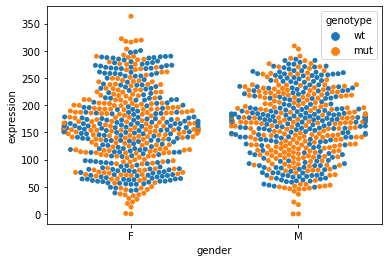

In [19]:
# swarmplot of overall gene expression divided by sex and genotype
sns.swarmplot(data=df_sample, x='gender', y='expression', hue='genotype')

<AxesSubplot:xlabel='gender', ylabel='expression'>

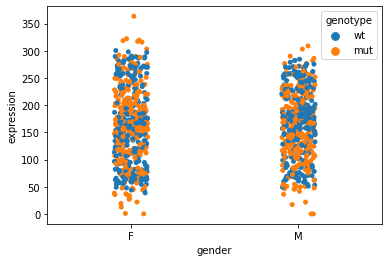

In [20]:
# stripplot of overall gene expression divided by sex and genotype
sns.stripplot(data=df_sample,x='gender', y='expression', hue='genotype')

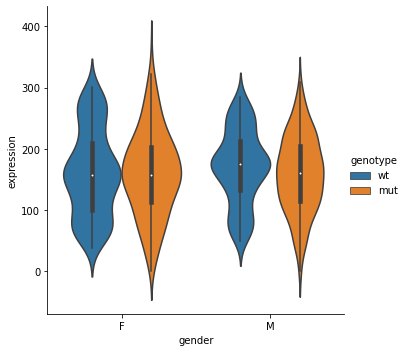

In [21]:
# catplot of overall gene expression divided by sex and genotype in boxplot
sns.catplot(data=df_sample,x='gender', y='expression', hue='genotype',kind='violin')

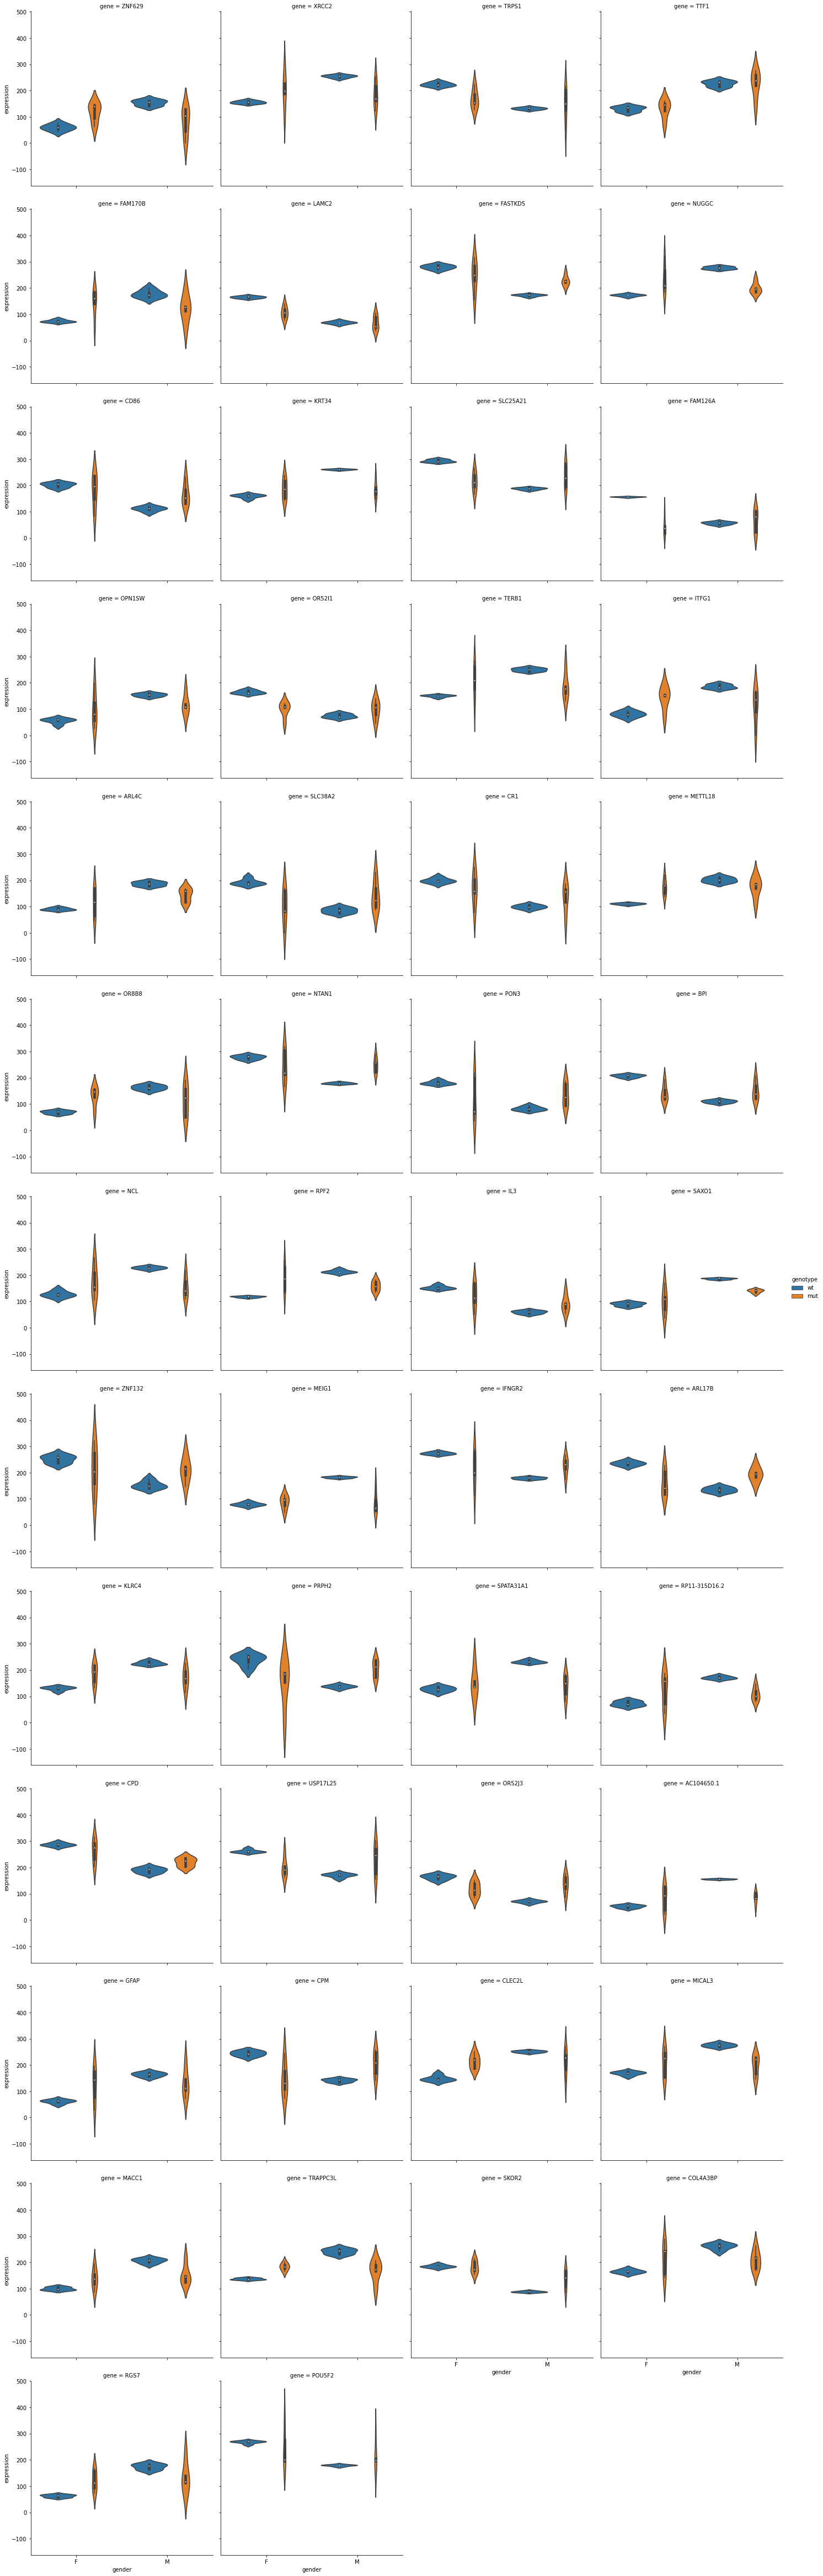

In [22]:
sns.catplot(data=df_sample,x='gender', y='expression', hue='genotype',col='gene',kind='violin', col_wrap=4, height=5)

In [23]:
coriander_df = find_a_gene(df_melt, 'coriander')

successfully find the gene


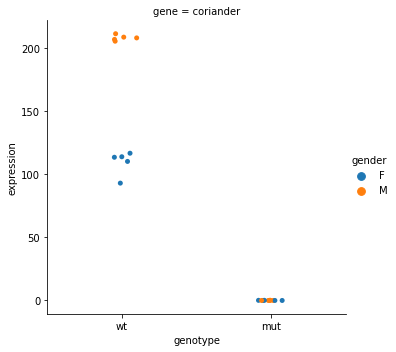

In [25]:
sns.catplot(data=coriander_df,x='genotype', y='expression', hue='gender', col='gene')

## Conclution:
The expression of gene `coriander` turned to zero after the mutation. The situation happends to both male and female. There is a clear clustering of gene expression in the WT with both gender, and after the trun off of the gene, it influence the level of expression on other genes by down regulate most of the genes in female and upregulate genes in male